In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")
orange_cap = pd.read_csv("orange_cap.csv")
purple_cap = pd.read_csv("purple_cap.csv")

In [5]:
matches.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


In [6]:

deliveries.head()

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,22-Mar-25,League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,22-Mar-25,League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,22-Mar-25,League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,1,22-Mar-25,League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,1,22-Mar-25,League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


In [8]:
print("Matches Columns :", matches.columns.tolist())
print("Deliveries Columns :", deliveries.columns.tolist())
print("Orange Cap Columns :", orange_cap.columns.tolist())
print("Purpule Columns :", purple_cap.columns.tolist())

Matches Columns : ['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner', 'toss_decision', 'first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'match_result', 'match_winner', 'wb_runs', 'wb_wickets', 'balls_left', 'player_of_the_match', 'top_scorer', 'highscore', 'best_bowling', 'best_bowling_figure']
Deliveries Columns : ['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler', 'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs', 'wicket_type', 'player_dismissed', 'fielder']
Orange Cap Columns : ['Position', 'Batsman', 'Team', 'Matches', 'Innings', 'Not_out', 'Runs', 'Highest_score', 'Average', 'Balls_faced', 'Strike_rate', 'Hundreds', 'Fifties', 'Ducks', 'Fours', 'Sixes']
Purpule Columns : ['Position', 'Bowler', 'Team', 'Matches', 'Innings', 'Balls', 'Overs', 'Maidens', 'Runs', 'Wickets', 'Best_bowling_figure', 'Economy_rate', 'Four_wicket_haul', 'Five_wicket_hall']


In [9]:
# Extract season (year) from date column
matches['season'] = pd.to_datetime(matches['date'], format="%B %d,%Y").dt.year

deliveries = deliveries.merge(
    matches[['match_id', 'season', 'team1', 'team2', 'match_winner', 'toss_winner']],
    left_on='match_no', right_on='match_id', how='left'
)

In [10]:
def match_phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'
deliveries['phase'] = deliveries['over'].apply(match_phase)

In [ ]:
# Batting impact (simplified)
deliveries['Balls_faced'] = deliveries.apply(lambda x: 0 if x['wide'] > 0 else 1, axis=1)

batsman_stats = deliveries.groupby('striker').agg({'runs_of_bat':'sum', 'Balls_faced':'sum'}).reset_index()
batsman_stats.rename(columns={'striker':'Batsman', 'runs_of_bat':'Runs'}, inplace=True)

batsman_stats['Strike_rate'] = (batsman_stats['Runs'] / batsman_stats['Balls_faced']) * 100
batsman_stats['batting_impact'] = batsman_stats['Runs'] * batsman_stats['Strike_rate'] / 100

In [14]:
# Bowling impact (simplified)
deliveries['is_wicket'] = deliveries['player_dismissed'].notna().astype(int)
deliveries['total_runs'] = deliveries['runs_of_bat'] + deliveries['extras']
deliveries['legal_ball'] = deliveries.apply(lambda x: 0 if x['wide']>0 else 1, axis=1)

bowler_stats = deliveries.groupby('bowler').agg({'is_wicket':'sum', 'total_runs':'sum'}).reset_index()
bowler_stats['balls_bowled'] = deliveries.groupby('bowler')['legal_ball'].sum().values
bowler_stats['economy'] = (bowler_stats['total_runs']/bowler_stats['balls_bowled'])*6
bowler_stats['bowling_impact'] = bowler_stats['is_wicket']*20 - bowler_stats['economy']

In [38]:
# Merge and compute overall impact
impact = pd.merge(
    batsman_stats[['Batsman','batting_impact']], 
    bowler_stats[['bowler','bowling_impact']], 
    left_on='Batsman', right_on='bowler', how='outer'
)
impact.fillna(0, inplace=True)

impact['batting_impact'] = impact['batting_impact'].astype(int)
impact['total_impact'] = (impact['batting_impact'] + impact['bowling_impact']).astype(int)

In [39]:
# Top 10 Impact Players
top_players = impact.sort_values(by='total_impact', ascending=False)
print("Top 10 Impact Players of IPL 2025:")
top_players.head(10)

Top 10 Impact Players of IPL 2025:


,Batsman,batting_impact,bowler,bowling_impact,total_impact
173,Suryakumar Yadav,1203,0,0.0,1203
147,Sai Sudharsan,1185,0,0.0,1185
165,Shreyas Iyer,1057,0,0.0,1057
119,Pooran,1028,0,0.0,1028
93,Mitchell Marsh,1026,0,0.0,1026
167,Shubman Gill,1015,0,0.0,1015
77,Kohli,950,0,0.0,950
62,Jaiswal,892,0,0.0,892
121,Prabhsimran,881,0,0.0,881
30,Buttler,877,0,0.0,877


In [41]:
# Phase 4: Clutch Performances (Death Overs)

death_overs = deliveries[deliveries['phase']=='Death']

In [42]:
death_overs = deliveries[deliveries['phase']=='Death']

death_batsmen = death_overs.groupby('striker').agg({
    'runs_of_bat':'sum',
    'Balls_faced':'count'
}).reset_index()

death_batsmen['strike_rate'] = ((death_batsmen['runs_of_bat']/death_batsmen['Balls_faced'])*100).astype(int)
top_finishers = death_batsmen.sort_values(by='strike_rate', ascending=False).head(10)
print("Top Finishers in Death Overs:")
top_finishers.head(10)

Top Finishers in Death Overs:


,striker,runs_of_bat,Balls_faced,strike_rate
34,Ferguson,4,1,400
3,Abishek Porel,7,2,350
39,Harpreet Brar,7,2,350
4,Akash Deep,6,2,300
36,Gaikwad,6,2,300
114,Shepherd,70,25,280
86,Prabhsimran,25,9,277
96,Ravindra,24,9,266
61,Kwena Maphaka,8,3,266
22,Brevis,50,19,263


In [43]:
# Create the necessary derived columns first
deliveries['is_wicket'] = np.where(deliveries['wicket_type'].isnull(), 0, 1)
deliveries['total_runs'] = deliveries['runs_of_bat'] + deliveries['extras']

# Filter for death overs
death_overs = deliveries[deliveries['phase'] == 'Death']

# Group by bowler to get statistics using a valid column for counting
death_bowlers = death_overs.groupby('bowler').agg({
    'total_runs': 'sum',
    'striker': 'count',  # Use a valid column like 'striker' to count deliveries
    'is_wicket': 'sum'
}).reset_index()

# Rename the 'striker' column to 'ball_count' for clarity
death_bowlers.rename(columns={'striker': 'ball_count'}, inplace=True)

# Calculate overs and economy
death_bowlers['overs'] = (death_bowlers['ball_count'] / 6).round(1)
death_bowlers['economy'] = (death_bowlers['total_runs'] / death_bowlers['overs']).round(1)

# Sort to find the top 10 bowlers with the lowest economy
top_death_bowlers = death_bowlers[death_bowlers['ball_count'] >= 30].sort_values(by='economy', ascending=True).head(10)

print("Top Death Over Bowlers:")
top_death_bowlers.head(10)

Top Death Over Bowlers:


,bowler,total_runs,ball_count,is_wicket,overs,economy
52,Narine,27,30,2,5.0,5.4
93,Vipraj Nigam,37,39,2,6.5,5.7
39,Kuldeep Yadav,67,61,5,10.2,6.6
14,Bumrah,115,99,13,16.5,7.0
90,Varun Chakaravarthy,51,44,5,7.3,7.0
57,Noor Ahmad,111,84,8,14.0,7.9
69,Sai Kishore,79,53,5,8.8,9.0
28,Harshit Rana,106,70,6,11.7,9.1
21,Eshan Malinga,89,59,8,9.8,9.1
13,Boult,145,96,11,16.0,9.1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23108\2939772676.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='wins', data=team_wins, palette='rocket')


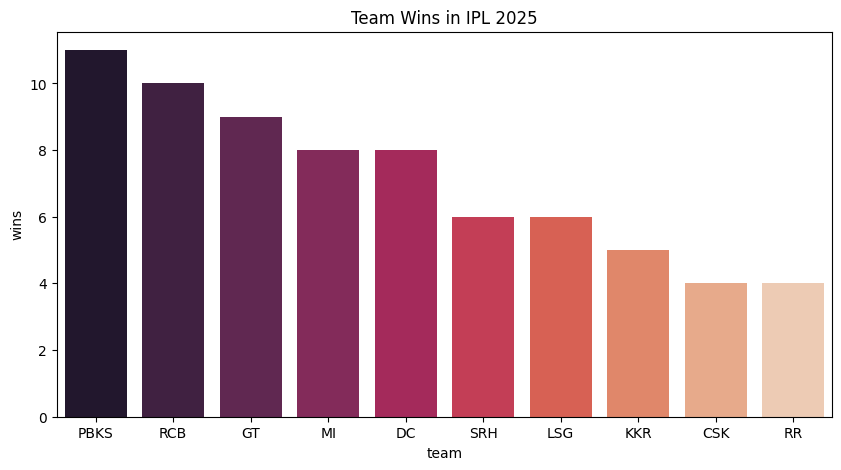

In [44]:
# Phase 5: Team Performance Analysis

team_wins = matches['match_winner'].value_counts().reset_index()
team_wins.columns = ['team','wins']

plt.figure(figsize=(10,5))
sns.barplot(x='team', y='wins', data=team_wins, palette='rocket')
plt.title("Team Wins in IPL 2025")
plt.show()

In [45]:
toss_wins = matches[matches['toss_winner']==matches['match_winner']]
toss_win_rate = len(toss_wins)/len(matches)*100
print(f"Toss Winning Impact on Match Outcome: {toss_win_rate:.2f}%")

Toss Winning Impact on Match Outcome: 56.76%


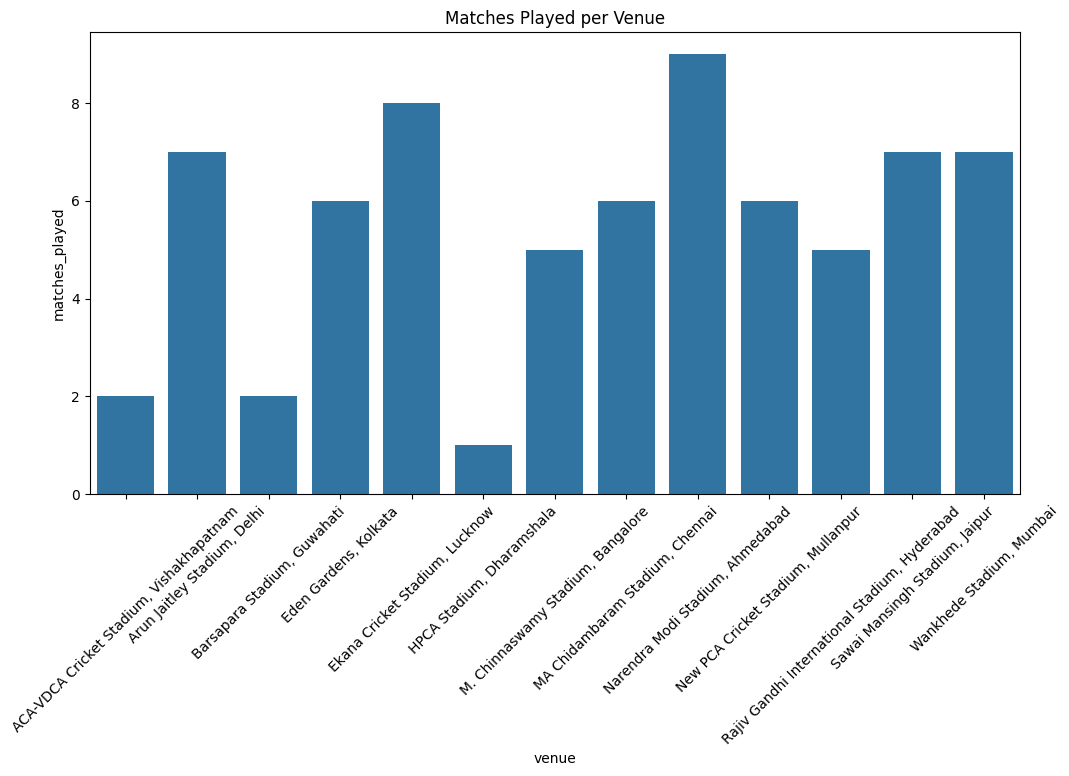

In [46]:
# Phase 6: Venue Analysis

venue_stats = matches.groupby('venue').agg({'match_winner':'count'}).reset_index()
venue_stats.columns = ['venue','matches_played']
plt.figure(figsize=(12,6))
sns.barplot(x='venue', y='matches_played', data=venue_stats)
plt.xticks(rotation=45)
plt.title("Matches Played per Venue")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23108\2387180062.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='match_winner', data=rcb_pbks_matches, palette=team_colors)


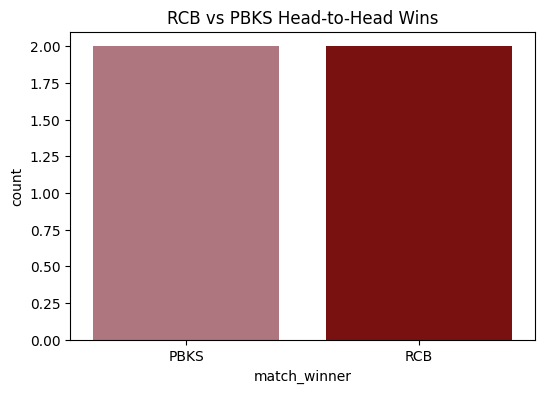

In [ ]:
# Phase 7: Head-to-Head Analysis (RCB vs PBKS Final)

rcb_pbks_matches = matches[((matches['team1']=='RCB') & (matches['team2']=='PBKS')) | 
                           ((matches['team1']=='PBKS') & (matches['team2']=='RCB'))]

team_colors = {
    'PBKS': "#e54f65",  # Pink Gold shade
    'RCB': "#b40000"    # Dark Red / Blackish
}

plt.figure(figsize=(6,4))
sns.countplot(x='match_winner', data=rcb_pbks_matches, palette=team_colors)
plt.title("RCB vs PBKS Head-to-Head Wins")
plt.show()